In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('cardata1.csv')
df

,Unnamed: 0,Unnamed: 0.1,price,year,brand,model,variant,kms,owner,Fuel,location
0,0,0.0,"₹4,55,299",2015,Maruti,Swift,VDI ABS Manual,"76,264 km",1st Owner,Diesel,New Delhi
1,1,1.0,"₹5,35,899",2013,Toyota,Innova,2.5 GX 7 STR BS IV Manual,"1,38,351 km",2nd Owner,Diesel,New Delhi
2,2,2.0,"₹3,30,599",2014,Maruti,Swift,VDI Manual,"71,450 km",2nd Owner,Diesel,New Delhi
3,3,3.0,"₹4,05,199",2015,Maruti,Swift,VDI ABS Manual,"37,925 km",1st Owner,Diesel,New Delhi
4,4,4.0,"₹12,71,199",2020,Honda,City,ZX CVT Automatic,"10,322 km",1st Owner,Petrol,New Delhi
...,...,...,...,...,...,...,...,...,...,...,...
5006,139,NaN,"9,75,000",2016,Hyundai,Creta,1.6 SX Opt Diesel,"63,314Km",First Owner,Diesel,Surat
5007,140,NaN,"3,75,950",2011,Mahindra,Scorpio,VLX 2WD AIRBAG BS III,"79,362Km",Third Owner,Diesel,Surat
5008,141,NaN,"4,35,000",2013,Renault,Duster,110 PS RXL 4X2 MT,"65,100Km",First Owner,Diesel,Surat
5009,142,NaN,"1,56,000",2013,Chevrolet,Beat,LS Diesel,"77,000Km",First Owner,Diesel,Surat


In [3]:
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [5]:
df

,price,year,brand,model,variant,kms,owner,Fuel,location
0,"₹4,55,299",2015,Maruti,Swift,VDI ABS Manual,"76,264 km",1st Owner,Diesel,New Delhi
1,"₹5,35,899",2013,Toyota,Innova,2.5 GX 7 STR BS IV Manual,"1,38,351 km",2nd Owner,Diesel,New Delhi
2,"₹3,30,599",2014,Maruti,Swift,VDI Manual,"71,450 km",2nd Owner,Diesel,New Delhi
3,"₹4,05,199",2015,Maruti,Swift,VDI ABS Manual,"37,925 km",1st Owner,Diesel,New Delhi
4,"₹12,71,199",2020,Honda,City,ZX CVT Automatic,"10,322 km",1st Owner,Petrol,New Delhi
...,...,...,...,...,...,...,...,...,...
5006,"9,75,000",2016,Hyundai,Creta,1.6 SX Opt Diesel,"63,314Km",First Owner,Diesel,Surat
5007,"3,75,950",2011,Mahindra,Scorpio,VLX 2WD AIRBAG BS III,"79,362Km",Third Owner,Diesel,Surat
5008,"4,35,000",2013,Renault,Duster,110 PS RXL 4X2 MT,"65,100Km",First Owner,Diesel,Surat
5009,"1,56,000",2013,Chevrolet,Beat,LS Diesel,"77,000Km",First Owner,Diesel,Surat


In [4]:
df.loc[df.owner=='1st Owner','owner']=1
df.loc[df.owner=='First Owner','owner']=1
df.loc[df.owner=='2nd Owner','owner']=2
df.loc[df.owner=='Second Owner','owner']=2
df.loc[df.owner=='3rd Owner','owner']=3
df.loc[df.owner=='Third Owner','owner']=3
df.loc[df.owner=='4th Owner','owner']=4
df.loc[df.owner=='Fourth Owner Or More','owner']=4

In [78]:
df.owner.unique()

array([1, 2, 3, 4], dtype=object)

In [5]:
df.kms=df.kms.str.replace('[km,Km]','')

In [6]:
df.year=df.year.str.replace('AT','')

In [7]:
df.price=df.price.str.replace('₹','')

In [8]:
df.location.value_counts()

Ahmedabad    838
Bengaluru    809
Chennai      782
Kolkata      684
Mumbai       632
New Delhi    549
Hyderabad    405
Jaipur       168
Surat        144
Name: location, dtype: int64

In [114]:
df.Fuel.unique()

array([0, 3, 4, 6, 5, 7, 2, 1])

In [112]:
df

,price,year,brand,model,variant,kms,owner,Fuel,location
0,455299.0,2015,15,157,VDI ABS Manual,76264,1,0,7
1,535899.0,2013,23,90,2.5 GX 7 STR BS IV Manual,138351,2,0,7
2,330599.0,2014,15,157,VDI Manual,71450,2,0,7
3,405199.0,2015,15,157,VDI ABS Manual,37925,1,0,7
4,1271199.0,2020,7,36,ZX CVT Automatic,10322,1,3,7
...,...,...,...,...,...,...,...,...,...
5006,975000.0,2016,8,42,1.6 SX Opt Diesel,63314,1,0,8
5007,375950.0,2011,14,148,VLX 2WD AIRBAG BS III,79362,3,0,8
5008,435000.0,2013,19,46,110 PS RXL 4X2 MT,65100,1,0,8
5009,156000.0,2013,2,21,LS Diesel,77000,1,0,8


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     5011 non-null   float64
 1   year      5011 non-null   int64  
 2   brand     5011 non-null   int32  
 3   model     5011 non-null   int32  
 4   variant   5011 non-null   object 
 5   kms       5011 non-null   int64  
 6   owner     5011 non-null   int64  
 7   Fuel      5011 non-null   int32  
 8   location  5011 non-null   int32  
dtypes: float64(1), int32(4), int64(3), object(1)
memory usage: 274.2+ KB


In [14]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
cols=['brand','model','Fuel','location']
df[cols]=df[cols].apply(lambda x: label.fit_transform(x))

In [36]:
df['price'].value_counts()

3,50,000     32
6,50,000     27
4,00,000     25
4,25,000     24
3,20,125     24
             ..
3,92,030      1
14,20,370     1
7,09,699      1
5,67,634      1
5,47,899      1
Name: price, Length: 2652, dtype: int64

In [17]:
df['price']=df.price.str.replace(',','')

In [20]:
df['price'] = df['price'].astype('float')

In [10]:
df["year"] = df["year"].astype("int64")

In [11]:
df["owner"] = df["owner"].astype('int64')

In [12]:
df["kms"] = df["kms"].astype('int64')

In [21]:
df

,price,year,brand,model,variant,kms,owner,Fuel,location
0,455299.0,2015,15,157,VDI ABS Manual,76264,1,0,7
1,535899.0,2013,23,90,2.5 GX 7 STR BS IV Manual,138351,2,0,7
2,330599.0,2014,15,157,VDI Manual,71450,2,0,7
3,405199.0,2015,15,157,VDI ABS Manual,37925,1,0,7
4,1271199.0,2020,7,36,ZX CVT Automatic,10322,1,3,7
...,...,...,...,...,...,...,...,...,...
5006,975000.0,2016,8,42,1.6 SX Opt Diesel,63314,1,0,8
5007,375950.0,2011,14,148,VLX 2WD AIRBAG BS III,79362,3,0,8
5008,435000.0,2013,19,46,110 PS RXL 4X2 MT,65100,1,0,8
5009,156000.0,2013,2,21,LS Diesel,77000,1,0,8


In [115]:
df.describe()

,price,year,brand,model,kms,owner,Fuel,location
count,5.011000e+03,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000
mean,5.764094e+05,2014.618639,12.964678,99.911794,54080.125723,1.268409,1.732788,3.286170
std,4.278102e+05,3.742143,5.816021,62.499020,42577.189396,0.531256,1.510126,2.532252
min,3.350000e+04,1998.000000,0.000000,0.000000,100.000000,1.000000,0.000000,0.000000
25%,3.250000e+05,2012.000000,8.000000,43.000000,26407.500000,1.000000,0.000000,1.000000
50%,4.826500e+05,2015.000000,15.000000,90.000000,51864.000000,1.000000,3.000000,3.000000
75%,6.849245e+05,2018.000000,15.000000,157.000000,74000.000000,1.000000,3.000000,6.000000
max,5.000000e+06,2021.000000,24.000000,201.000000,850002.000000,4.000000,7.000000,8.000000


<AxesSubplot:xlabel='owner', ylabel='price'>

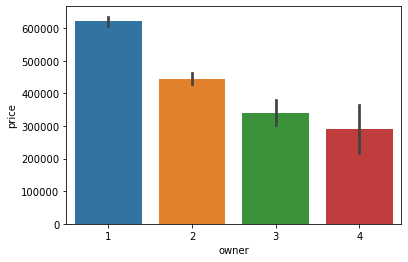

In [118]:
sns.barplot(y='price',x='owner',data=df)

<AxesSubplot:xlabel='Fuel', ylabel='price'>

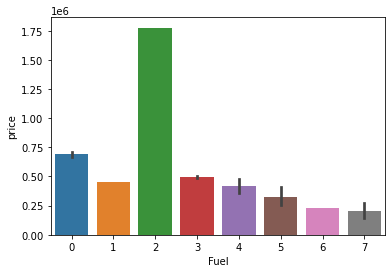

In [119]:
sns.barplot(y='price',x='Fuel',data=df)

<AxesSubplot:xlabel='year', ylabel='price'>

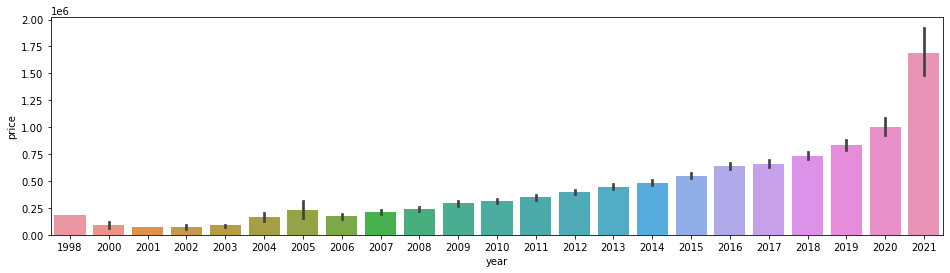

In [125]:
plt.figure(figsize=(16,4))
sns.barplot(y='price',x='year',data=df)

<AxesSubplot:xlabel='brand', ylabel='price'>

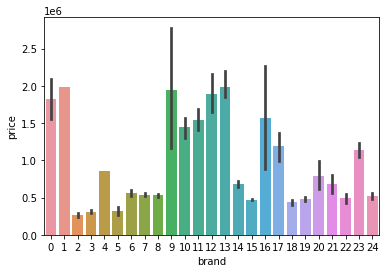

In [120]:
sns.barplot(y='price',x='brand',data=df)

In [16]:
df['Fuel'].unique()

array(['Diesel', 'Petrol', 'Petrol + CNG', 'Petrol + LPG', 'Petrol + Cng',
       'Petrol + Lpg', 'Hybrid', 'Electric'], dtype=object)

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'brand'}>,
        <AxesSubplot:title={'center':'model'}>],
       [<AxesSubplot:title={'center':'kms'}>,
        <AxesSubplot:title={'center':'owner'}>,
        <AxesSubplot:title={'center':'Fuel'}>,
        <AxesSubplot:title={'center':'location'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

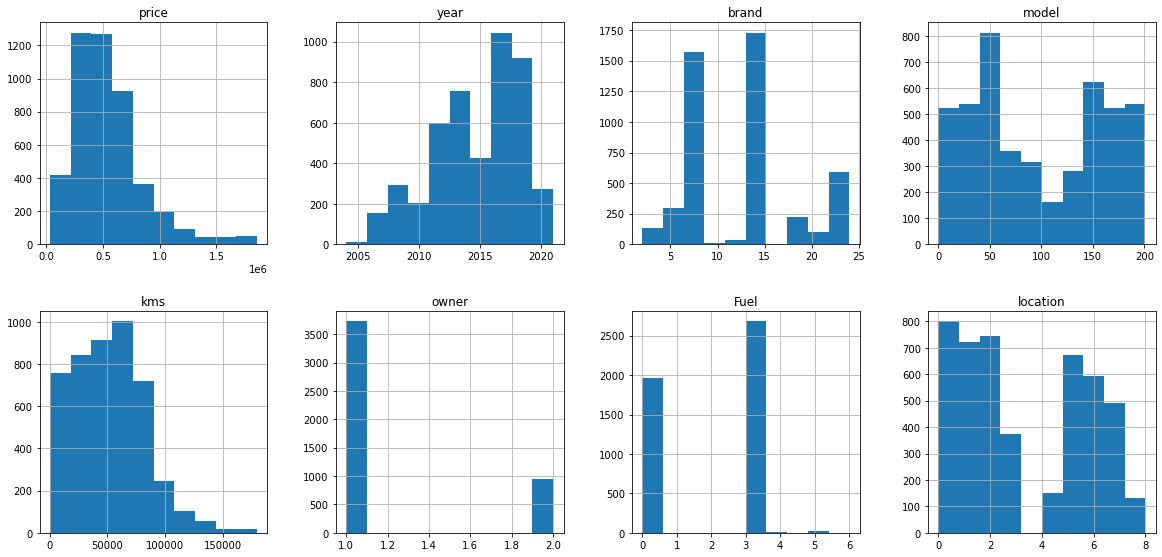

In [171]:
dfnew.hist(figsize=(20,20),layout=(4,4))

price           AxesSubplot(0.125,0.71587;0.133621x0.16413)
year         AxesSubplot(0.285345,0.71587;0.133621x0.16413)
brand         AxesSubplot(0.44569,0.71587;0.133621x0.16413)
model        AxesSubplot(0.606034,0.71587;0.133621x0.16413)
kms          AxesSubplot(0.766379,0.71587;0.133621x0.16413)
owner          AxesSubplot(0.125,0.518913;0.133621x0.16413)
Fuel        AxesSubplot(0.285345,0.518913;0.133621x0.16413)
location     AxesSubplot(0.44569,0.518913;0.133621x0.16413)
dtype: object

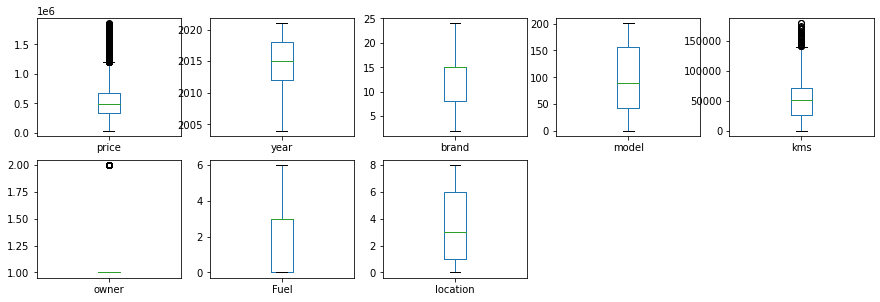

In [172]:
dfnew.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))

In [173]:
dfnew.skew()

price       1.447014
year       -0.509664
brand       0.320814
model       0.141767
kms         0.577929
owner       1.474016
Fuel       -0.282955
location    0.215572
dtype: float64

<AxesSubplot:>

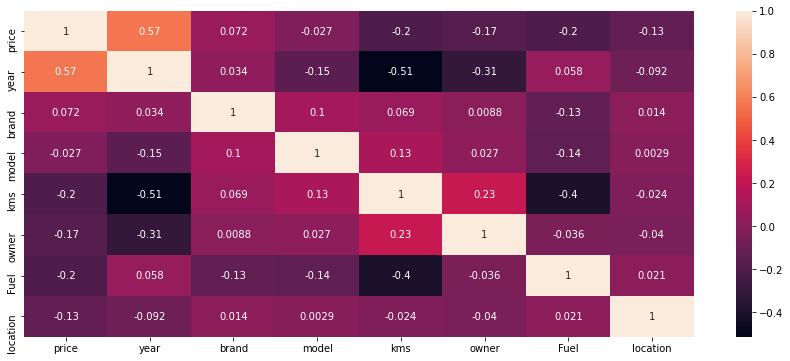

In [174]:
plt.figure(figsize=(15,6))                        #figure size
sns.heatmap(dfnew.corr(),annot=True)

In [137]:
df

,price,year,brand,model,variant,kms,owner,Fuel,location
0,455299.0,2015,15,157,VDI ABS Manual,76264,1,0,7
1,535899.0,2013,23,90,2.5 GX 7 STR BS IV Manual,138351,2,0,7
2,330599.0,2014,15,157,VDI Manual,71450,2,0,7
3,405199.0,2015,15,157,VDI ABS Manual,37925,1,0,7
4,1271199.0,2020,7,36,ZX CVT Automatic,10322,1,3,7
...,...,...,...,...,...,...,...,...,...
5006,975000.0,2016,8,42,1.6 SX Opt Diesel,63314,1,0,8
5007,375950.0,2011,14,148,VLX 2WD AIRBAG BS III,79362,3,0,8
5008,435000.0,2013,19,46,110 PS RXL 4X2 MT,65100,1,0,8
5009,156000.0,2013,2,21,LS Diesel,77000,1,0,8


In [32]:
df1=df.drop(['variant'],axis=1)

In [33]:
df1

,price,year,brand,model,kms,owner,Fuel,location
0,455299.0,2015,15,157,76264,1,0,7
1,535899.0,2013,23,90,138351,2,0,7
2,330599.0,2014,15,157,71450,2,0,7
3,405199.0,2015,15,157,37925,1,0,7
4,1271199.0,2020,7,36,10322,1,3,7
...,...,...,...,...,...,...,...,...
5006,975000.0,2016,8,42,63314,1,0,8
5007,375950.0,2011,14,148,79362,3,0,8
5008,435000.0,2013,19,46,65100,1,0,8
5009,156000.0,2013,2,21,77000,1,0,8


In [133]:
y=df['price']

In [34]:
# removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df1))
threshold=3
dfnew=df1[(z<3).all(axis=1)]
dfnew.shape

(4680, 8)

In [35]:
x=dfnew.drop(['price'],axis=1)
y=dfnew['price']

In [36]:
#Scaling the x using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(x)
x_std = sc.fit_transform(x)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score,accuracy_score
from sklearn.model_selection import train_test_split

In [37]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression()]
max_r2_score=0
for r_state in range(40,90):
    x_train,x_test,y_train,y_test=train_test_split(x_std,y,random_state=r_state,test_size=0.33)
    for i in model:
        i.fit(x_train,y_train)
        pred=i.predict(x_test)
        r2_sc=r2_score(y_test,pred)
        if r2_sc>max_r2_score:
            max_r2_score=r2_sc
            final_state=r_state
            final_model=i

print("max r2 score correspond to random state",final_state,"is",max_r2_score,"and model is",final_model)

max r2 score correspond to random state 76 is 0.7179849012515411 and model is DecisionTreeRegressor()


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x_std,y,random_state=76,test_size=0.33)

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
print(cross_val_score(DecisionTreeRegressor(),x_std,y,cv=5).mean())

0.5467954134969226


In [160]:
from sklearn.model_selection import GridSearchCV

In [162]:
parameter={'criterion':["squared_error", "absolute_error"],
          'max_depth':range(1,9),
          'max_features':["auto", "sqrt", "log2"],
          'min_samples_leaf':(1,2),
          'splitter':['best','random']}
GCV=GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)
GCV.fit(x_train,y_train)

GCV.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'splitter': 'best'}

In [45]:
final_mod=DecisionTreeRegressor(criterion='squared_error',max_depth=8,
                                max_features='auto',min_samples_leaf=2,splitter='best')
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc)

0.6702326124420339


In [46]:
print('Error:')

print("Mean absolute error:",mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean square error:',np.sqrt(mean_squared_error(y_test,pred)))

Error:
Mean absolute error: 116455.31758375368
Mean squared error: 30734956128.454994
Root Mean square error: 175313.8788814365


In [176]:
x[10:20]

,year,brand,model,kms,owner,Fuel,location
10,2018,8,42,39294,2,3,7
11,2019,15,20,20976,1,3,7
12,2017,24,13,40293,2,3,7
13,2014,7,26,49831,1,3,7
14,2016,15,178,72378,1,0,7
15,2015,8,42,80045,2,0,7
17,2017,15,158,51316,2,0,7
18,2019,15,35,7620,2,3,7
19,2020,7,12,12514,1,3,7
20,2016,15,178,41629,1,0,7


In [177]:
dfnew[10:20]

,price,year,brand,model,kms,owner,Fuel,location
10,898799.0,2018,8,42,39294,2,3,7
11,712399.0,2019,15,20,20976,1,3,7
12,517799.0,2017,24,13,40293,2,3,7
13,330899.0,2014,7,26,49831,1,3,7
14,658799.0,2016,15,178,72378,1,0,7
15,776799.0,2015,8,42,80045,2,0,7
17,515599.0,2017,15,158,51316,2,0,7
18,825399.0,2019,15,35,7620,2,3,7
19,646899.0,2020,7,12,12514,1,3,7
20,784299.0,2016,15,178,41629,1,0,7


In [47]:
final_mod.predict(x[10:20])

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


array([820999.5, 820999.5, 820999.5, 820999.5, 820999.5, 820999.5,
       820999.5, 820999.5, 820999.5, 820999.5])

In [181]:
import joblib
joblib.dump(final_mod,'usedcar.obj')

['usedcar.obj']